In [1]:
####Importing Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
####Combining all 12 months of sales data into a single CSV file
all_month_data = []
files=[file for file in os.listdir('D:\Sales Performance Analysis\Sales_Data')]
for file in files:
    df=file   
    df=pd.read_csv('D:\Sales Performance Analysis\Sales_Data\\'+df)
    all_month_data.append(df)
    combined_df = pd.concat(all_month_data, ignore_index=True)  
combined_df.to_csv('D:\Sales Performance Analysis\Sales_Data\Combined_Sales_Data.csv', index=False)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\abbax\AppData\Local\Temp\ipykernel_4968\1892793739.py:3: SyntaxWarning: invalid escape sequence '\S'
  files=[file for file in os.listdir('D:\Sales Performance Analysis\Sales_Data')]
C:\Users\abbax\AppData\Local\Temp\ipykernel_4968\1892793739.py:6: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv('D:\Sales Performance Analysis\Sales_Data\\'+df)
C:\Users\abbax\AppData\Local\Temp\ipykernel_4968\1892793739.py:9: SyntaxWarning: invalid escape sequence '\S'
  combined_df.to_csv('D:\Sales Performance Analysis\Sales_Data\Combined_Sales_Data.csv', index=False)


In [3]:
####Reading the combined CSV file
combined_df = pd.read_csv('D:\Sales Performance Analysis\Sales_Data\Combined_Sales_Data.csv')
print(combined_df.head())

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\abbax\AppData\Local\Temp\ipykernel_4968\3485920768.py:2: SyntaxWarning: invalid escape sequence '\S'
  combined_df = pd.read_csv('D:\Sales Performance Analysis\Sales_Data\Combined_Sales_Data.csv')


   Unnamed: 0 Order ID                     Product Quantity Ordered  \
0         0.0   176558        USB-C Charging Cable                2   
1         1.0      NaN                         NaN              NaN   
2         2.0   176559  Bose SoundSport Headphones                1   
3         3.0   176560                Google Phone                1   
4         4.0   176560            Wired Headphones                1   

  Price Each      Order Date                      Purchase Address  
0      11.95  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1        NaN             NaN                                   NaN  
2      99.99  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3        600  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4      11.99  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [4]:
####Removing rows with missing values
combined_df.dropna(inplace=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.head(5)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3.0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5.0,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
####Finding 'Or' and removing it
combined_df= combined_df[combined_df['Order Date'].str[0:2] != 'Or']
combined_df.head(5)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3.0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5.0,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
####Making a new column 'Month' from 'Order Date'
combined_df['Month'] = combined_df['Order Date'].str[0:2]
combined_df['Month'] = combined_df['Month'].astype(int)
combined_df.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3.0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5.0,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [7]:
####Converting Quantity and Price columns to numeric
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'], errors='coerce')
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'], errors='coerce')  

In [8]:
####Creating a new column 'Sales'
combined_df['Sales'] = combined_df['Quantity Ordered'] * combined_df['Price Each']
combined_df.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,3.0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,5.0,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [9]:
####Grouping by 'Month' and summing the 'Sales'
monthly_sales=combined_df.groupby('Month')['Sales'].sum().reset_index()
print(monthly_sales)

    Month        Sales
0       1   5466770.19
1       2   6606067.26
2       3   8421301.14
3       4  10172010.72
4       5   9457820.25
5       6   7733406.78
6       7   7943327.28
7       8   6733403.64
8       9   6292680.39
9      10  11210180.64
10     11   9598809.60
11     12  13840330.02


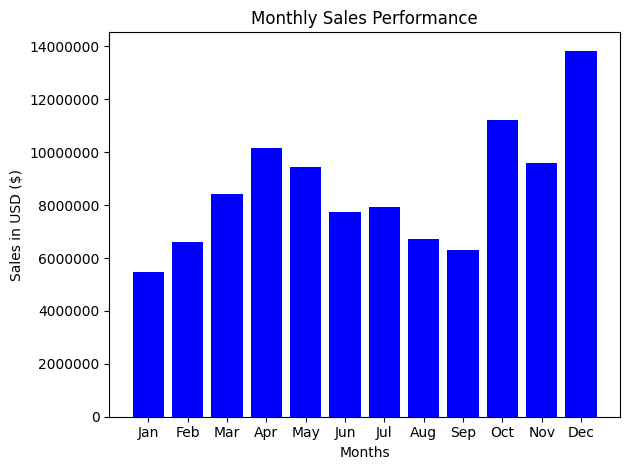

In [10]:
####Generating bar chart for monthly sales
months=range(1,13)
plt.bar(months, monthly_sales['Sales'], color='blue')
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)') 
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Sales Performance')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()
####December sales are highest, followed by April and October.


In [11]:
####splitting the cities from the 'Purchase Address'
combined_df[['Street', 'City', 'State_ZIP']] = combined_df['Purchase Address'].str.split(',', expand=True)
# Split only on the first space to avoid ValueError
combined_df[['State', 'ZIP']] = combined_df['State_ZIP'].str.strip().str.split(' ', n=1, expand=True)
combined_df = combined_df.drop('State_ZIP', axis=1) 
combined_df.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State,ZIP
0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
1,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
2,3.0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
3,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
4,5.0,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001


In [12]:
####Grouping by 'City' and summing the 'Sales'
city_sales= combined_df.groupby('City')['Sales'].sum().reset_index()
print(city_sales)   

             City        Sales
0         Atlanta   8386495.74
1          Austin   5458745.25
2          Boston  10984926.03
3          Dallas   8303926.20
4     Los Angeles  16357712.40
5   New York City  13992952.29
6        Portland   6961471.83
7   San Francisco  24786611.73
8         Seattle   8243266.44


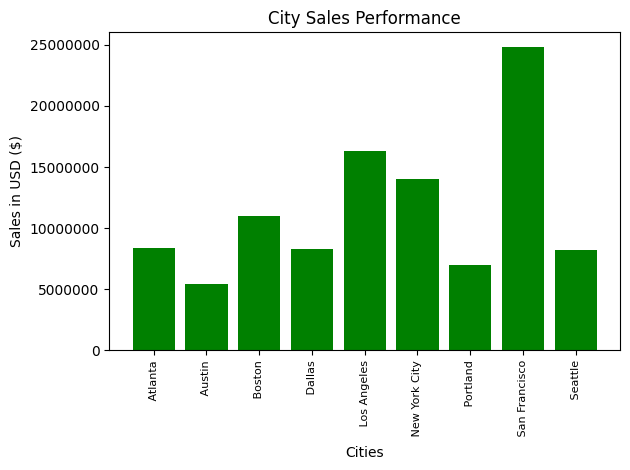

In [13]:
####Plotting the sales by city graph
citiesindex = [city for city in city_sales['City']] 
plt.bar(citiesindex, city_sales['Sales'], color='green')
plt.xticks(citiesindex,rotation='vertical',size=8,)
plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)')
plt.title('City Sales Performance')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()
####San Francisco has the highest sales, followed by Los Angeles and New York City.

In [14]:
####Coverting 'Order Date' to datetime format
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'],)
combined_df['Hour']=combined_df['Order Date'].dt.hour
combined_df.head(5)

C:\Users\abbax\AppData\Local\Temp\ipykernel_4968\3854592773.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'],)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State,ZIP,Hour
0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001,8
1,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215,22
2,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001,14
3,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001,14
4,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001,9


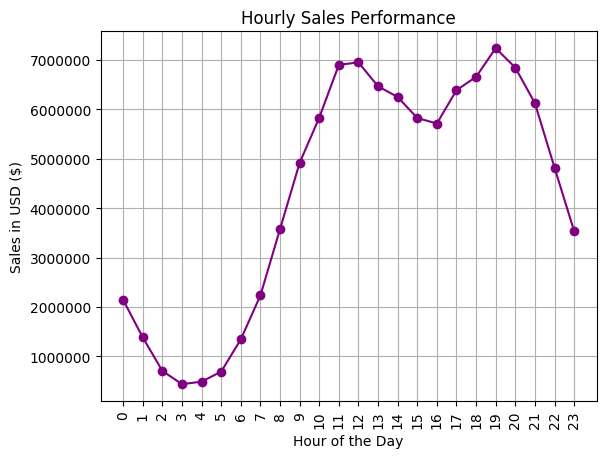

In [15]:
####Finding the best time to sell
hourly_sales=combined_df.groupby('Hour')['Sales'].sum().reset_index()
hours = [hours for hours in hourly_sales['Hour']]
plt.plot(hours, hourly_sales['Sales'], marker='o', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales in USD ($)')
plt.title('Hourly Sales Performance')
plt.xticks(hours, rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
####The best time to sell is between 11 AM and 1 PM, with a peak at 12 PM.

In [17]:
# Find orders with more than one product
multi_product_orders = combined_df[combined_df['Order ID'].duplicated(keep=False)]

# Group products by Order ID
grouped = multi_product_orders.groupby('Order ID')['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product': 'Grouped'})
grouped.head(5)


,Order ID,Grouped
0,141234,"iPhone,iPhone,iPhone"
1,141235,"Lightning Charging Cable,Lightning Charging Ca..."
2,141236,"Wired Headphones,Wired Headphones,Wired Headph..."
3,141237,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,141238,"Wired Headphones,Wired Headphones,Wired Headph..."


In [18]:
####Grouping the products sold together
from itertools import combinations
from collections import Counter

count = Counter()
# Only count pairs of different products in each order
for row in grouped['Grouped']:
    row_list = row.split(',')
    # Use set to avoid duplicate products in the same order
    unique_products = set(row_list)
    # Only consider pairs of different products
    count.update(Counter(combinations(sorted(unique_products), 2)))
for key, value in count.most_common(10):
    print(key, value)
    
####Iphone and Lightning Charger are the most frequently sold products together, followed by Google and USB-C Charging Cable, and iPhone and Wired Headphones.

('Lightning Charging Cable', 'iPhone') 1011
('Google Phone', 'USB-C Charging Cable') 997
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 422
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 203
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129


Text(0.5, 1.0, 'Product Sales Performance')

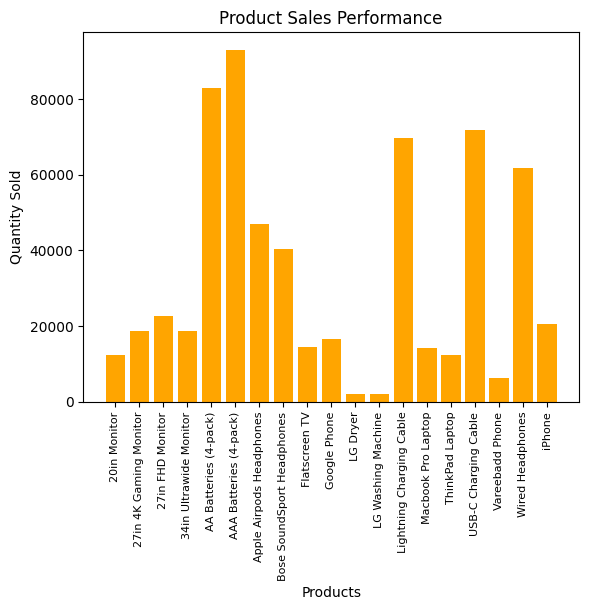

In [19]:
####Plotting the most frequently sold products 
product_sales = combined_df.groupby('Product')
quantity_sold = product_sales['Quantity Ordered'].sum().reset_index()
print(product_sales)
products = [products for products in quantity_sold['Product']]
plt.bar(products, quantity_sold['Quantity Ordered'], color='orange')
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.title('Product Sales Performance')

                       Product  Price Each
0                 20in Monitor      109.99
1       27in 4K Gaming Monitor      389.99
2             27in FHD Monitor      149.99
3       34in Ultrawide Monitor      379.99
4        AA Batteries (4-pack)        3.84
5       AAA Batteries (4-pack)        2.99
6     Apple Airpods Headphones      150.00
7   Bose SoundSport Headphones       99.99
8                Flatscreen TV      300.00
9                 Google Phone      600.00
10                    LG Dryer      600.00
11          LG Washing Machine      600.00
12    Lightning Charging Cable       14.95
13          Macbook Pro Laptop     1700.00
14             ThinkPad Laptop      999.99
15        USB-C Charging Cable       11.95
16             Vareebadd Phone      400.00
17            Wired Headphones       11.99
18                      iPhone      700.00


C:\Users\abbax\AppData\Local\Temp\ipykernel_4968\3291271500.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


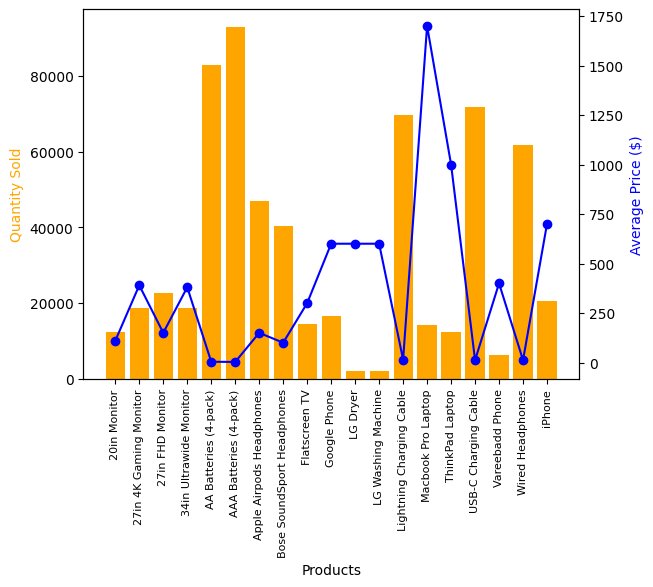

In [20]:

prices = combined_df.groupby('Product')['Price Each'].mean().reset_index()
print(prices)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_sold['Quantity Ordered'], color='orange')
ax2.plot(products, prices['Price Each'], color='blue', marker='o')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Sold', color='orange')
ax2.set_ylabel('Average Price ($)', color='blue')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()
